In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn import metrics
                        
from imblearn.pipeline import make_pipeline as make_pipeline_imb 
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold


from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, recall_score

## We took a dataset from  ULB Machine Learning Group from Kaggle which is titled as Credit Card Fraud Prediction. 

In [2]:
# Loading the Dataset
df_credit = pd.read_csv("creditcard.csv")

In [3]:
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df_credit.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df_credit[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


# Firstly, we are exploring through 3 different Feature columns:


    Time
    Amount
    Class


In [6]:
# Here printing the Distribution of Normal(0) and Frauds(1)
print("Distribuition of Normal(0) and Frauds(1): ")
print(df_credit["Class"].value_counts())


Distribuition of Normal(0) and Frauds(1): 
Class
0    284315
1       492
Name: count, dtype: int64


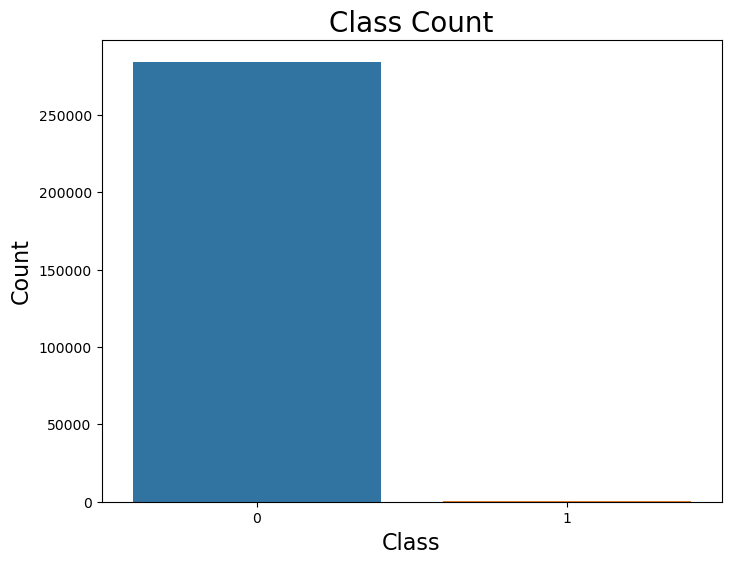

In [7]:
# Plotting the Bar Graph
plt.figure(figsize=(8, 6)) 
sns.countplot(x='Class', data=df_credit)  
# Graph is titled as Class Count
plt.title("Class Count", fontsize=20)  
plt.xlabel("Class", fontsize=16) 
plt.ylabel("Count", fontsize=16)
plt.show()


# Logistic Regression 
 

## Intially we performed Logistic Regression ias a base model.

In [8]:
X = df_credit.drop(["Class"], axis=1).values 
y = df_credit["Class"].values 


In [9]:

# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

# Instantiate logistic regression classifier
logistic_regression = LogisticRegression(max_iter=1000)

# on the training data Fitting the logistic regression model on the training data
logistic_regression.fit(X_train, y_train)

logistic_regression_pred = logistic_regression.predict(X_test)

# Print the evaluation metrics
print("Logistic Regression Results:", y_test, logistic_regression_pred)


Logistic Regression Results: [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


In [10]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, logistic_regression_pred)

# Calculating the F1 score
f1 = f1_score(y_test, logistic_regression_pred)

# Calculating the recall score
recall = recall_score(y_test, logistic_regression_pred)

# Print the scores
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)


Accuracy: 0.9993504441557529
F1 Score: 0.7581699346405228
Recall Score: 0.6904761904761905


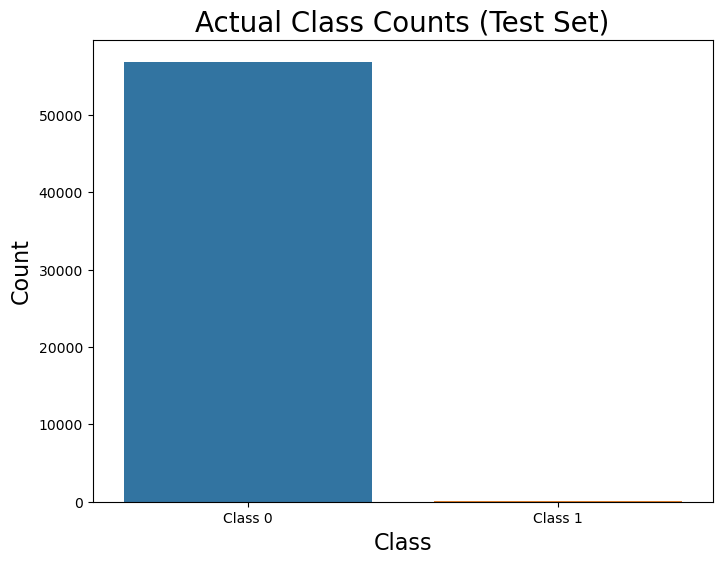

In [11]:
# Count occurrences of each class in y_test
test_counts = [sum(y_test == i) for i in set(y_test)]

labels = ['Class {}'.format(i) for i in set(y_test)]

data = {'Class': labels, 'Count': test_counts}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6)) 
sns.barplot(x='Class', y='Count', data=df) 
plt.title("Actual Class Counts (Test Set)", fontsize=20)  
plt.xlabel("Class", fontsize=16) 
plt.ylabel("Count", fontsize=16)
plt.show()


## Here we can see  a clearly imbalanced data.
## So we are using SMOTE to Balance the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)


print("normal data distribution: {}".format(Counter(y))) 
X_smote, y_smote = SMOTE().fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


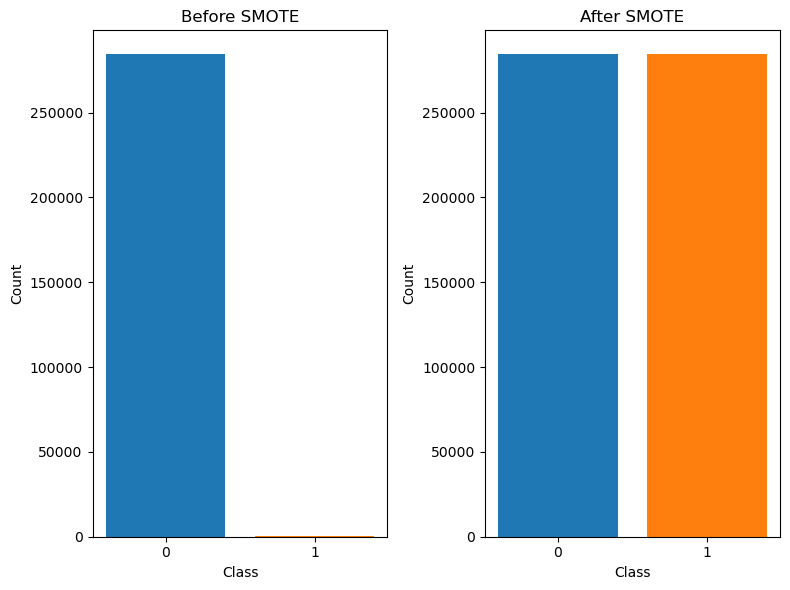

In [13]:
plt.figure(figsize=(8, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
plt.bar(Counter(y).keys(), Counter(y).values(), color=['tab:blue', 'tab:orange']) 
plt.title('Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(list(Counter(y).keys()))

# After SMOTE
plt.subplot(1, 2, 2)
plt.bar(Counter(y_smote).keys(), Counter(y_smote).values(), color=['tab:blue', 'tab:orange'])  
plt.title('After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(list(Counter(y_smote).keys()))

plt.tight_layout()
plt.show()


# SMOTE + RandomForest classification

## After Balancing the data we performed Random Forest Classification

In [14]:
# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   RandomForestClassifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print("\nSMOTE + RandomForest classification", )
print(classification_report(y_test, smote_prediction))


SMOTE Pipeline Score 0.9996313331694814

SMOTE + RandomForest classification
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.88      0.87      0.87        84

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962



<Figure size 800x600 with 0 Axes>

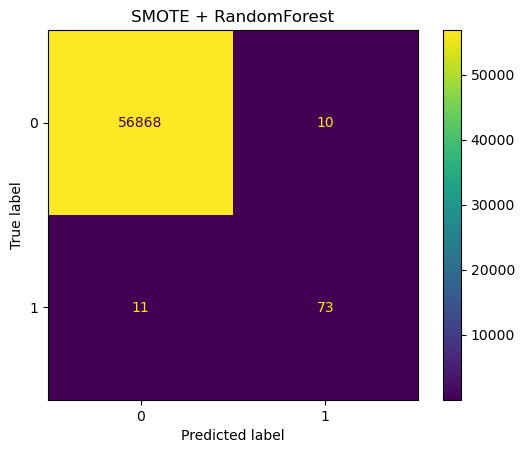

In [15]:
cm = confusion_matrix(y_test, smote_prediction)
plt.figure(figsize=(8, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.title('SMOTE + RandomForest')

plt.show()



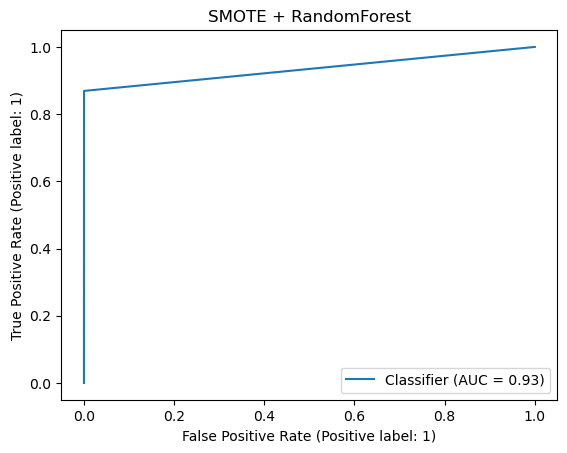

In [16]:
RocCurveDisplay.from_predictions(y_test, smote_prediction)

plt.title('SMOTE + RandomForest')
plt.show()

## In this model we achevied a best F1 score and AUC value is 0.93.

In [17]:
# Performing the Cross Validation
k = 5


k_fold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = cross_val_score(smote_pipeline, X_train, y_train, cv=k_fold, scoring='accuracy')

print("Cross-validation scores:", cv_scores)

print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())

Cross-validation scores: [0.99953916 0.99945138 0.99920999 0.99964888 0.99956111]
Mean CV accuracy: 0.9994821040619719
Standard deviation of CV accuracy: 0.00014986829712273524


# SMOTE + XGBoost Classifier

## To achevie better results in detecting fraud transactions we performed SMOTE + XGBoost Classifier on a balanced data set.

In [18]:
# Build model with SMOTE
smote_pipeline_xgb = make_pipeline_imb(SMOTE(random_state=4), XGBClassifier(random_state=42))

# Fit the model
smote_model_xgb = smote_pipeline_xgb.fit(X_train, y_train)
smote_prediction_xgb = smote_model_xgb.predict(X_test)

# Showing the difference before and afterholds = precision_recall_curve(y_test, y_pred_class) the transformation used
print("Normal data distribution: {}".format(Counter(y))) 
X_smote_xgb, y_smote_xgb = SMOTE().fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote_xgb)))


Normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


In [19]:

print('\nSMOTE Pipeline Score: {}'.format(smote_pipeline_xgb.score(X_test, y_test)))

print("\nSMOTE + XGB classification")
print(classification_report(y_test, smote_prediction_xgb))


SMOTE Pipeline Score: 0.999403110845827

SMOTE + XGB classification
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.77      0.85      0.81        84

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



<Figure size 800x600 with 0 Axes>

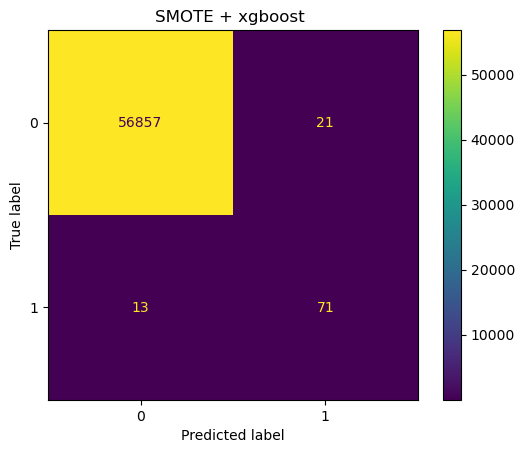

In [20]:
cm = confusion_matrix(y_test, smote_prediction_xgb)
plt.figure(figsize=(8, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.title('SMOTE + xgboost ')

plt.show()


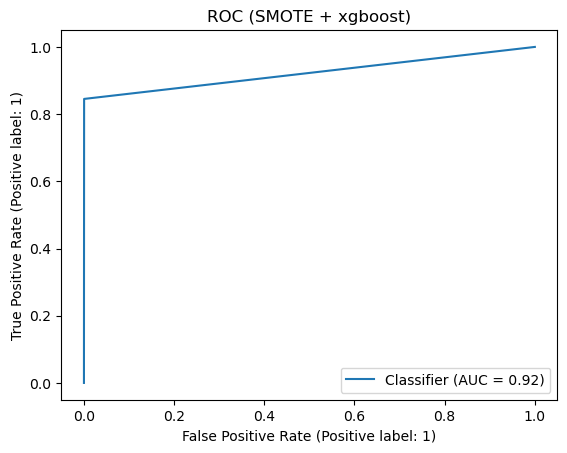

In [21]:
RocCurveDisplay.from_predictions(y_test, smote_prediction_xgb)


plt.title('ROC (SMOTE + xgboost)')
plt.show()

In this model we are achieving F1 score and AUC value is closer to the SMOTE + Random Forest model

# SMOTE + Isolation Forest Classifier

## We performed SMOTE + Isolation Forest it is the another way to deal with the imbalanced data


In [22]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(X_train_resampled)


y_pred = isolation_forest.predict(X_test)

y_pred_class = [1 if x == -1 else 0 for x in y_pred]

print("\nSMOTE + Isolation Forest classification", )
print(classification_report(y_test, y_pred_class))
 


SMOTE + Isolation Forest classification
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56878
           1       0.04      0.32      0.08        84

    accuracy                           0.99     56962
   macro avg       0.52      0.66      0.54     56962
weighted avg       1.00      0.99      0.99     56962



<Figure size 800x600 with 0 Axes>

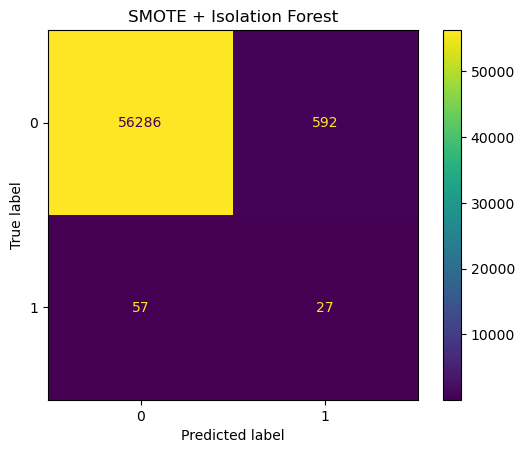

In [23]:
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.title('SMOTE + Isolation Forest')

plt.show()


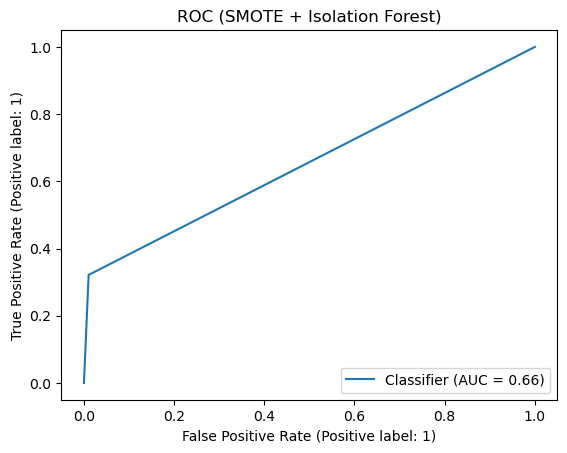

In [24]:
RocCurveDisplay.from_predictions(y_test, y_pred_class)
plt.title('ROC (SMOTE + Isolation Forest)')
plt.show()

In [25]:
n_splits = 5  

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


precision_scores = []
recall_scores = []
f1_scores = []


for train_index, test_index in kf.split(X_train):    
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]


    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    

    isolation_forest_fold = IsolationForest(random_state=42)
    isolation_forest_fold.fit(X_train_fold_resampled)
    

    y_pred_fold = isolation_forest_fold.predict(X_val_fold)
    
    y_pred_class_fold = [1 if x == -1 else 0 for x in y_pred_fold]
    
    print(classification_report(y_val_fold, y_pred_class_fold))
    

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     45481
           1       0.06      0.36      0.10        88

    accuracy                           0.99     45569
   macro avg       0.53      0.68      0.55     45569
weighted avg       1.00      0.99      0.99     45569

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     45490
           1       0.04      0.22      0.06        79

    accuracy                           0.99     45569
   macro avg       0.52      0.60      0.53     45569
weighted avg       1.00      0.99      0.99     45569

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     45487
           1       0.05      0.32      0.09        82

    accuracy                           0.99     45569
   macro avg       0.52      0.65      0.54     45569
weighted avg       1.00      0.99      0.99     45569

              preci

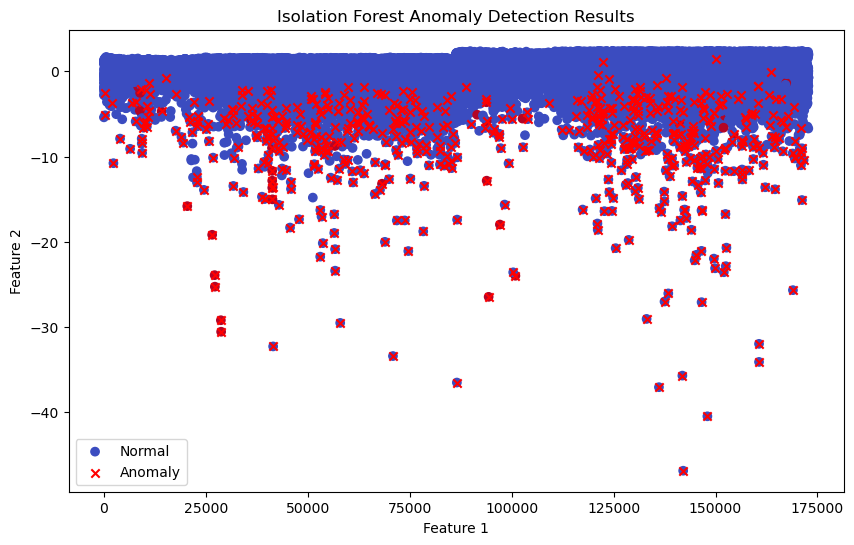

In [26]:
# Create a scatter plot of the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='o', label='Normal')
plt.scatter(X_test[y_pred == -1, 0], X_test[y_pred == -1, 1], c='red', marker='x', label='Anomaly')

plt.title('Isolation Forest Anomaly Detection Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()





# Conclusion 

After performing the above models, we acheived best F1_score and AUC value for SMOTE + RANDOMFOREST MODEL and for SMOTE +  XGB MODEL. The worst model is SMOTE + ISOLATION FOREST.